<a href="https://colab.research.google.com/github/Logenleedev/HKU-Astrophysics/blob/main/HKU_Astrophysics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install seaborn
sns.__version__

'0.11.1'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import sklearn
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_csv ('/content/drive/MyDrive/Research/Astrophysics/updated_4FGL.csv')

In [ ]:
print(df)

            Source_Name  DataRelease  ...  Unc_Counterpart  Flags
0     4FGL J0000.3-7355            1  ...              NaN      0
1     4FGL J0000.5+0743            2  ...              NaN      0
2     4FGL J0000.7+2530            3  ...              NaN      0
3     4FGL J0001.2+4741            1  ...     8.400000e-07      0
4     4FGL J0001.2-0747            1  ...     1.800000e-07      0
...                 ...          ...  ...              ...    ...
6654  4FGL J2359.3-2049            1  ...     1.000000e-06      0
6655  4FGL J2359.3+1444            1  ...              NaN      2
6656  4FGL J2359.7-5041            3  ...     4.500000e-03      0
6657  4FGL J2359.9-3736            1  ...     3.278325e-07      0
6658  4FGL J2359.9+3145            3  ...     4.500000e-03      0

[6659 rows x 79 columns]


In [ ]:
sorted(df)

['ASSOC1',
 'ASSOC2',
 'ASSOC_4FGL',
 'ASSOC_FGL',
 'ASSOC_FHL',
 'ASSOC_GAM1',
 'ASSOC_GAM2',
 'ASSOC_GAM3',
 'ASSOC_PROB_BAY',
 'ASSOC_PROB_LR',
 'ASSOC_TEV',
 'CLASS1',
 'CLASS2',
 'Conf_68_PosAng',
 'Conf_68_SemiMajor',
 'Conf_68_SemiMinor',
 'Conf_95_PosAng',
 'Conf_95_SemiMajor',
 'Conf_95_SemiMinor',
 'DEC_Counterpart',
 'DEJ2000',
 'DataRelease',
 'Energy_Flux100',
 'Extended_Source_Name',
 'Flags',
 'Flux1000',
 'Flux_Band',
 'Flux_History',
 'Flux_Peak',
 'Frac_Variability',
 'GLAT',
 'GLON',
 'LP_EPeak',
 'LP_Flux_Density',
 'LP_Index',
 'LP_SigCurv',
 'LP_beta',
 'Npred',
 'PLEC_EPeak',
 'PLEC_Exp_Index',
 'PLEC_ExpfactorS',
 'PLEC_Flux_Density',
 'PLEC_IndexS',
 'PLEC_SigCurv',
 'PL_Flux_Density',
 'PL_Index',
 'Peak_Interval',
 'Pivot_Energy',
 'RAJ2000',
 'RA_Counterpart',
 'ROI_num',
 'Signif_Avg',
 'Signif_Peak',
 'Source_Name',
 'SpectrumType',
 'Sqrt_TS_Band',
 'Sqrt_TS_History',
 'TEVCAT_FLAG',
 'Time_Peak',
 'Unc_Counterpart',
 'Unc_Energy_Flux100',
 'Unc_Flux1000'

In [ ]:
df.loc[(df["LP_EPeak"] < 1000), "CLASS1"] = "Soft"

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf = df.select_dtypes(include=numerics)


newdf.insert(0,"class_4FGL", df["CLASS1"])
newdf

,class_4FGL,DataRelease,RAJ2000,DEJ2000,GLON,GLAT,Conf_68_SemiMajor,Conf_68_SemiMinor,Conf_68_PosAng,Conf_95_SemiMajor,Conf_95_SemiMinor,Conf_95_PosAng,ROI_num,Signif_Avg,Pivot_Energy,Flux1000,Unc_Flux1000,Energy_Flux100,Unc_Energy_Flux100,PL_Flux_Density,Unc_PL_Flux_Density,PL_Index,Unc_PL_Index,LP_Flux_Density,Unc_LP_Flux_Density,LP_Index,Unc_LP_Index,LP_beta,Unc_LP_beta,LP_SigCurv,LP_EPeak,Unc_LP_EPeak,PLEC_Flux_Density,Unc_PLEC_Flux_Density,PLEC_IndexS,Unc_PLEC_IndexS,PLEC_ExpfactorS,Unc_PLEC_ExpfactorS,PLEC_Exp_Index,Unc_PLEC_Exp_Index,PLEC_SigCurv,PLEC_EPeak,Unc_PLEC_EPeak,Npred,Variability_Index,Frac_Variability,Unc_Frac_Variability,Signif_Peak,Flux_Peak,Unc_Flux_Peak,Time_Peak,Peak_Interval,ASSOC_PROB_BAY,ASSOC_PROB_LR,RA_Counterpart,DEC_Counterpart,Unc_Counterpart,Flags
0,NaN,1,0.0983,-73.9220,307.708980,-42.729538,0.032378,0.031453,-62.70,0.0525,0.0510,-62.70,1532,7.459561,2329.5903,1.392216e-10,2.362096e-11,1.581100e-12,2.811228e-13,2.610434e-14,4.429607e-15,2.179690,0.135742,2.904301e-14,6.179337e-15,2.063685,0.242461,0.091939,0.138896,0.749253,1647.64270,2.851526e+03,2.918480e-14,5.628575e-15,1.993013,0.237311,0.150609,0.157339,0.666667,NaN,1.292339,2438.50100,3654.85300,305.21463,14.602470,0.215777,0.413314,-inf,-inf,-inf,-inf,-inf,0.000000,0.000000,NaN,NaN,NaN,0
1,NaN,2,0.1375,7.7273,101.656480,-53.029457,0.094544,0.069999,-10.22,0.1533,0.1135,-10.22,307,5.271726,1304.1947,1.951913e-10,4.085454e-11,1.121896e-12,3.292749e-13,1.039931e-13,2.185767e-14,2.349694,0.140494,1.575568e-13,3.636783e-14,2.069591,0.371520,0.454411,0.289610,2.549887,1208.05740,4.912381e+02,1.475405e-13,3.376789e-14,1.998095,0.310854,0.586220,0.402050,0.666667,NaN,2.532814,1308.43460,691.02340,197.24410,25.399525,0.687574,0.284856,5.156346,3.136125e-09,7.956976e-10,507590016.0,31560000.0,0.000000,0.000000,NaN,NaN,NaN,0
2,NaN,3,0.1878,25.5153,108.775070,-35.959175,0.051373,0.041012,82.40,0.0833,0.0665,82.40,623,4.177483,6318.9400,7.202151e-11,2.553710e-11,8.571274e-13,2.713094e-13,2.058057e-15,6.494554e-16,1.852803,0.211903,3.043761e-15,1.165287e-15,1.646164,0.447546,0.376358,0.370307,1.471139,10111.06800,6.127807e+03,3.079466e-15,1.173057e-15,1.507830,0.514213,0.720244,0.682527,0.666667,NaN,1.562938,11096.56900,5117.60640,87.70652,13.650518,0.000000,10.000000,-inf,-inf,-inf,-inf,-inf,0.000000,0.000000,NaN,NaN,NaN,0
3,bcu,1,0.3126,47.6859,114.250200,-14.338059,0.036880,0.033180,-45.90,0.0598,0.0538,-45.90,860,4.692600,2420.5752,1.259796e-10,2.877197e-11,1.499454e-12,3.968492e-13,2.156031e-14,4.906863e-15,2.271696,0.179057,2.196550e-14,6.115012e-15,2.254081,0.226351,0.012156,0.108880,0.083893,NaN,NaN,2.228697e-14,5.419623e-15,2.219642,0.229325,0.029462,0.091426,0.666667,NaN,0.337723,NaN,NaN,293.14978,25.313953,0.675882,0.312850,5.201714,8.072130e-09,2.148715e-09,286670016.0,31560000.0,0.996097,0.938563,0.329341,47.700201,8.400000e-07,0
4,Soft,1,0.3151,-7.7971,89.032720,-67.305010,0.018440,0.017577,64.10,0.0299,0.0285,64.10,933,23.782486,1721.6039,7.471219e-10,5.041939e-11,8.339171e-12,5.499454e-13,2.656894e-13,1.741041e-14,2.116692,0.049792,2.842831e-13,2.173665e-14,2.078927,0.065974,0.051182,0.033735,1.697737,796.29785,7.667974e+02,2.813444e-13,2.077029e-14,2.046604,0.070298,0.063212,0.042852,0.666667,NaN,1.892928,624.23950,1758.48960,1192.35190,46.780693,0.406565,0.111870,10.646099,1.772592e-08,2.242407e-09,349790016.0,31560000.0,0.997014,0.932932,0.325104,-7.774145,1.800000e-07,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6654,bll,1,359.8357,-20.8189,58.090145,-76.542860,0.024607,0.021462,-73.90,0.0399,0.0348,-73.90,1485,15.950886,2594.2498,3.462985e-10,3.494565e-11,3.883922e-12,3.999699e-13,5.196033e-14,5.244068e-15,1.984188,0.078500,5.197384e-14,6.182733e-15,1.982751,0.090347,0.001760,0.038331,0.000000,348031.94000,3.374152e+07,5.348124e-14,5.777153e

In [ ]:
target_df = newdf[["class_4FGL","Flux1000", "PL_Index", "LP_Index", "LP_SigCurv", "PLEC_ExpfactorS", "PLEC_Flux_Density","Frac_Variability"]]





In [ ]:
mod_df = target_df.dropna(axis=0)
mod_df = mod_df.replace([np.inf, -np.inf], np.nan).dropna(axis=0)

mod_df

,class_4FGL,Flux1000,PL_Index,LP_Index,LP_SigCurv,PLEC_ExpfactorS,PLEC_Flux_Density,Frac_Variability
3,bcu,1.259796e-10,2.271696,2.254081,0.083893,0.029462,2.228697e-14,0.675882
4,Soft,7.471219e-10,2.116692,2.078927,1.697737,0.063212,2.813444e-13,0.406565
5,bll,1.082246e-10,1.939160,1.661223,0.425023,0.179718,6.563064e-15,0.000000
6,Soft,1.347354e-09,2.654060,2.514159,8.188197,0.192549,5.180525e-11,0.996138
8,bcu,2.821817e-10,1.775176,1.693865,1.517829,0.064962,2.050626e-14,0.490977
...,...,...,...,...,...,...,...,...
6654,bll,3.462985e-10,1.984188,1.982751,0.000000,0.026185,5.348124e-14,0.177217
6655,Soft,1.796826e-10,2.595140,2.324850,2.408406,0.490786,1.091525e-12,0.369278
6656,Soft,8.286240e-11,2.684101,2.596392,2.850321,1.196060,3.012063e-13,0.000000
6657,bcu,1.915395e-10,2.120210,2.007299,1.697972,0.104679,7.524951e-14,0.000000


In [ ]:
mod_df_log_transform  = mod_df.copy()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4bb686a610>,
      dtype=object)

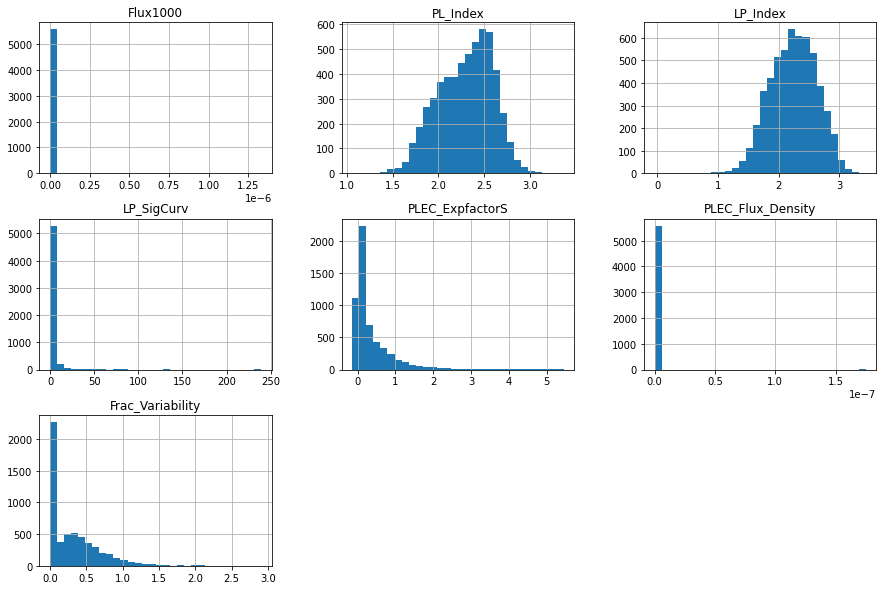

In [ ]:
mod_df_log_transform.hist(bins=30, figsize=(15, 10))

In [ ]:
print(mod_df_log_transform['class_4FGL'].value_counts())

Soft    3102
bll     1042
bcu      892
fsrq     131
MSP       89
PSR       70
unk       67
spp       42
rdg       26
msp       21
glc       19
SNR       15
BLL       11
PWN        9
snr        8
pwn        7
agn        7
bin        5
gal        4
lmb        3
RDG        3
sbg        3
SFR        2
hmb        2
psr        1
sey        1
HMB        1
css        1
Name: class_4FGL, dtype: int64


In [ ]:
mod_df_log_transform.loc[(mod_df_log_transform.class_4FGL == 'FSRQ'),'class_4FGL']='fsrq'
mod_df_log_transform.loc[(mod_df_log_transform.class_4FGL == 'PSR'),'class_4FGL']='psr'
mod_df_log_transform.loc[(mod_df_log_transform.class_4FGL == 'BCU'),'class_4FGL']='bcu'
mod_df_log_transform.loc[(mod_df_log_transform.class_4FGL == 'BLL'),'class_4FGL']='bll'

In [ ]:
mod_df_log_transform.loc[(mod_df_log_transform.class_4FGL == 'bcu'),'class_4FGL']='bcu-bll-fsrq-agn'
mod_df_log_transform.loc[(mod_df_log_transform.class_4FGL == 'bll'),'class_4FGL']='bcu-bll-fsrq-agn'
mod_df_log_transform.loc[(mod_df_log_transform.class_4FGL == 'fsrq'),'class_4FGL']='bcu-bll-fsrq-agn'
mod_df_log_transform.loc[(mod_df_log_transform.class_4FGL == 'agn'),'class_4FGL']='bcu-bll-fsrq-agn'

In [ ]:
# drop rdg
indexNames_rdg = mod_df_log_transform[mod_df_log_transform['class_4FGL'] == 'rdg'].index
mod_df_log_transform.drop(indexNames_rdg , inplace=True)
# drop unk
indexNames_unk = mod_df_log_transform[mod_df_log_transform['class_4FGL'] == 'unk'].index
mod_df_log_transform.drop(indexNames_unk , inplace=True)
# drop LMB
indexNames_LMB = mod_df_log_transform[mod_df_log_transform['class_4FGL'] == 'LMB'].index
mod_df_log_transform.drop(indexNames_LMB , inplace=True)

In [ ]:
# drop nlsy1
indexNames_nlsy1 = mod_df_log_transform[mod_df_log_transform['class_4FGL'] == 'nlsy1'].index
mod_df_log_transform.drop(indexNames_nlsy1 , inplace=True)

# drop sfr
indexNames_sfr = mod_df_log_transform[mod_df_log_transform['class_4FGL'] == 'sfr'].index
mod_df_log_transform.drop(indexNames_sfr , inplace=True)

# drop ssrq
indexNames_ssrq = mod_df_log_transform[mod_df_log_transform['class_4FGL'] == 'ssrq'].index
mod_df_log_transform.drop(indexNames_ssrq , inplace=True)

# snr
indexNames_snr = mod_df_log_transform[mod_df_log_transform['class_4FGL'] == 'snr'].index
mod_df_log_transform.drop(indexNames_snr , inplace=True)

# drop HMB
indexNames_HMB = mod_df_log_transform[mod_df_log_transform['class_4FGL'] == 'HMB'].index
mod_df_log_transform.drop(indexNames_HMB , inplace=True)

# drop pwn
indexNames_pwn = mod_df_log_transform[mod_df_log_transform['class_4FGL'] == 'pwn'].index
mod_df_log_transform.drop(indexNames_pwn , inplace=True)

# drop NOV
indexNames_NOV = mod_df_log_transform[mod_df_log_transform['class_4FGL'] == 'NOV'].index
mod_df_log_transform.drop(indexNames_NOV , inplace=True)

# RDG
indexNames_RDG = mod_df_log_transform[mod_df_log_transform['class_4FGL'] == 'RDG'].index
mod_df_log_transform.drop(indexNames_RDG , inplace=True)

In [ ]:
# drop css
indexNames_css = mod_df_log_transform[mod_df_log_transform['class_4FGL'] == 'css'].index
mod_df_log_transform.drop(indexNames_css , inplace=True)

# drop PWN
indexNames_PWN = mod_df_log_transform[mod_df_log_transform['class_4FGL'] == 'PWN'].index
mod_df_log_transform.drop(indexNames_PWN , inplace=True)

# drop glc
indexNames_glc = mod_df_log_transform[mod_df_log_transform['class_4FGL'] == 'glc'].index
mod_df_log_transform.drop(indexNames_glc , inplace=True)

# drop spp
indexNames_spp = mod_df_log_transform[mod_df_log_transform['class_4FGL'] == 'spp'].index
mod_df_log_transform.drop(indexNames_spp , inplace=True)

# drop bin
indexNames_bin = mod_df_log_transform[mod_df_log_transform['class_4FGL'] == 'bin'].index
mod_df_log_transform.drop(indexNames_bin , inplace=True)

# drop gal
indexNames_gal = mod_df_log_transform[mod_df_log_transform['class_4FGL'] == 'gal'].index
mod_df_log_transform.drop(indexNames_gal , inplace=True)

# drop lmb
indexNames_lmb = mod_df_log_transform[mod_df_log_transform['class_4FGL'] == 'lmb'].index
mod_df_log_transform.drop(indexNames_lmb , inplace=True)

# drop sbg
indexNames_sbg = mod_df_log_transform[mod_df_log_transform['class_4FGL'] == 'sbg'].index
mod_df_log_transform.drop(indexNames_sbg , inplace=True)

# drop SFR
indexNames_SFR = mod_df_log_transform[mod_df_log_transform['class_4FGL'] == 'SFR'].index
mod_df_log_transform.drop(indexNames_SFR , inplace=True)

# drop hmb
indexNames_hmb = mod_df_log_transform[mod_df_log_transform['class_4FGL'] == 'hmb'].index
mod_df_log_transform.drop(indexNames_hmb, inplace=True)

# drop sey
indexNames_sey = mod_df_log_transform[mod_df_log_transform['class_4FGL'] == 'sey'].index
mod_df_log_transform.drop(indexNames_sey , inplace=True)

In [ ]:
print(mod_df_log_transform['class_4FGL'].value_counts())

Soft                3102
bcu-bll-fsrq-agn    2083
MSP                   89
psr                   71
msp                   21
SNR                   15
Name: class_4FGL, dtype: int64


In [ ]:
list(mod_df_log_transform.columns)

['class_4FGL',
 'Flux1000',
 'PL_Index',
 'LP_Index',
 'LP_SigCurv',
 'PLEC_ExpfactorS',
 'PLEC_Flux_Density',
 'Frac_Variability']

In [ ]:
mod_df_log_transform.to_csv('Post_process_4FGL.csv')

In [ ]:
# sns.pairplot(mod_df_log_transform, hue="class_4FGL",diag_kind='hist')

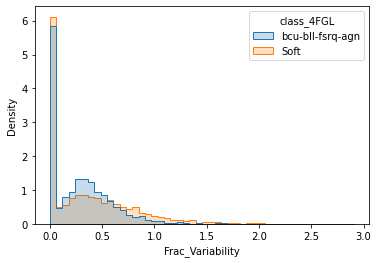

In [ ]:
# Plot histogram, change the variable name to plot different columns. Check seaborn doc at: https://seaborn.pydata.org/generated/seaborn.histplot.html
target = mod_df_log_transform.loc[(mod_df_log_transform['class_4FGL'] == 'bcu-bll-fsrq-agn') | (mod_df_log_transform['class_4FGL'] == 'Soft')]
sns.histplot(data=target, x="Frac_Variability", hue="class_4FGL", element="step", stat="density", common_norm=False,)

In [ ]:
# Plot scatter plot, change the variable name to plot different columns.
temp = mod_df_log_transform[(mod_df_log_transform['class_4FGL'] == 'bcu-bll-fsrq-agn') | (mod_df_log_transform['class_4FGL'] == 'Soft')]

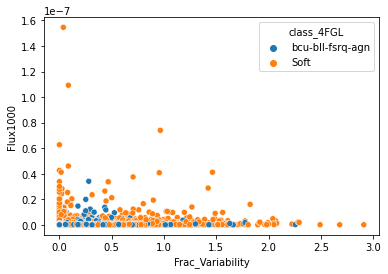

In [ ]:
sns.scatterplot(data=temp, x="Frac_Variability", y="Flux1000", hue="class_4FGL")

## Apply RFE algo


In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE

In [ ]:
X = mod_df_log_transform.loc[:, mod_df_log_transform.columns != 'class_4FGL']
y = mod_df_log_transform['class_4FGL']
print(X.shape, y.shape)

(749, 18) (749,)


In [ ]:
# define dataset
X, y = make_classification(n_samples=749, n_features=18, n_informative=6, n_redundant=12, random_state=1)
# create pipeline
rfe = RFECV(estimator=DecisionTreeClassifier())
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=8, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.859 (0.045)


In [ ]:
# define RFE
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=8)
# fit RFE
rfe.fit(X, y)
# summarize all features
for i in range(X.shape[1]):
	print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected True, Rank: 1.000
Column: 1, Selected False, Rank: 3.000
Column: 2, Selected False, Rank: 11.000
Column: 3, Selected True, Rank: 1.000
Column: 4, Selected False, Rank: 7.000
Column: 5, Selected False, Rank: 2.000
Column: 6, Selected False, Rank: 8.000
Column: 7, Selected True, Rank: 1.000
Column: 8, Selected False, Rank: 9.000
Column: 9, Selected True, Rank: 1.000
Column: 10, Selected False, Rank: 6.000
Column: 11, Selected False, Rank: 10.000
Column: 12, Selected True, Rank: 1.000
Column: 13, Selected True, Rank: 1.000
Column: 14, Selected False, Rank: 5.000
Column: 15, Selected True, Rank: 1.000
Column: 16, Selected True, Rank: 1.000
Column: 17, Selected False, Rank: 4.000


In [ ]:
mod_df_log_transform.iloc[:,18]

4      -0.900011
8      -0.711358
19     -0.524452
38     -0.673270
43     -0.419666
          ...   
6602   -0.300978
6609   -0.790560
6616   -0.563295
6626   -0.248118
6644   -0.566784
Name: Frac_Variability, Length: 749, dtype: float64